In [1]:
from pyk4a import PyK4A, Config
from copy import deepcopy
import pyk4a
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
import matplotlib.animation as animation

In [2]:
config = Config(depth_mode=pyk4a.DepthMode.WFOV_2X2BINNED,
                    synchronized_images_only=True)

In [3]:
# Load camera with the default config
k4a = PyK4A(config=config)
k4a.connect()

In [22]:
# Get the next color frame without the depth (blocking function)
img_color, img_depth = k4a.get_capture(color_only=False, transform_depth_to_color=True)

In [23]:
img_color.shape

(720, 1280, 4)

In [24]:
img_depth.shape

(720, 1280)

<IPython.core.display.Javascript object>


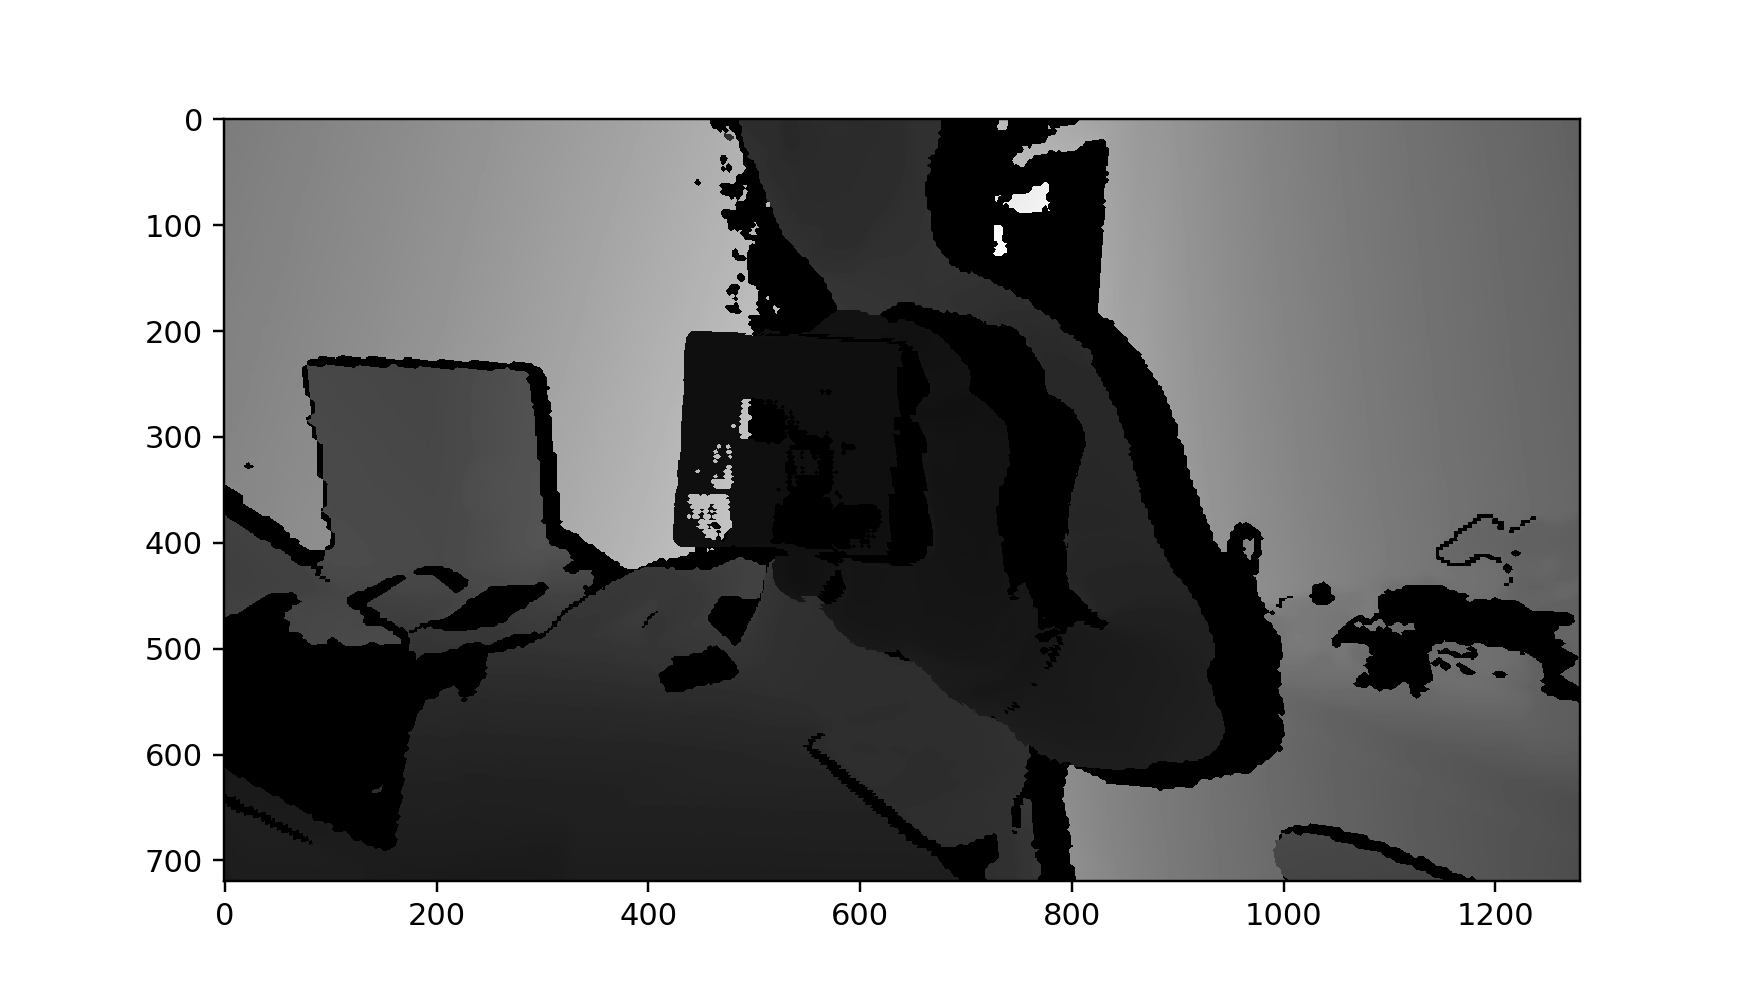

In [25]:
# Display with pyplot
fig, ax = subplots(figsize=(16/2, 9/2))
im_depth = plt.imshow(img_depth, cmap='gray')
# BGRA to RGB
im_color = plt.imshow(img_color[:, :, :3][...,::-1])
ims = []
ims.append([im_depth])   # , im_color]
ims.append([im_color])
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=1000)
# plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())

In [7]:
%matplotlib notebook

%matplotlib ipympl

<IPython.core.display.Javascript object>


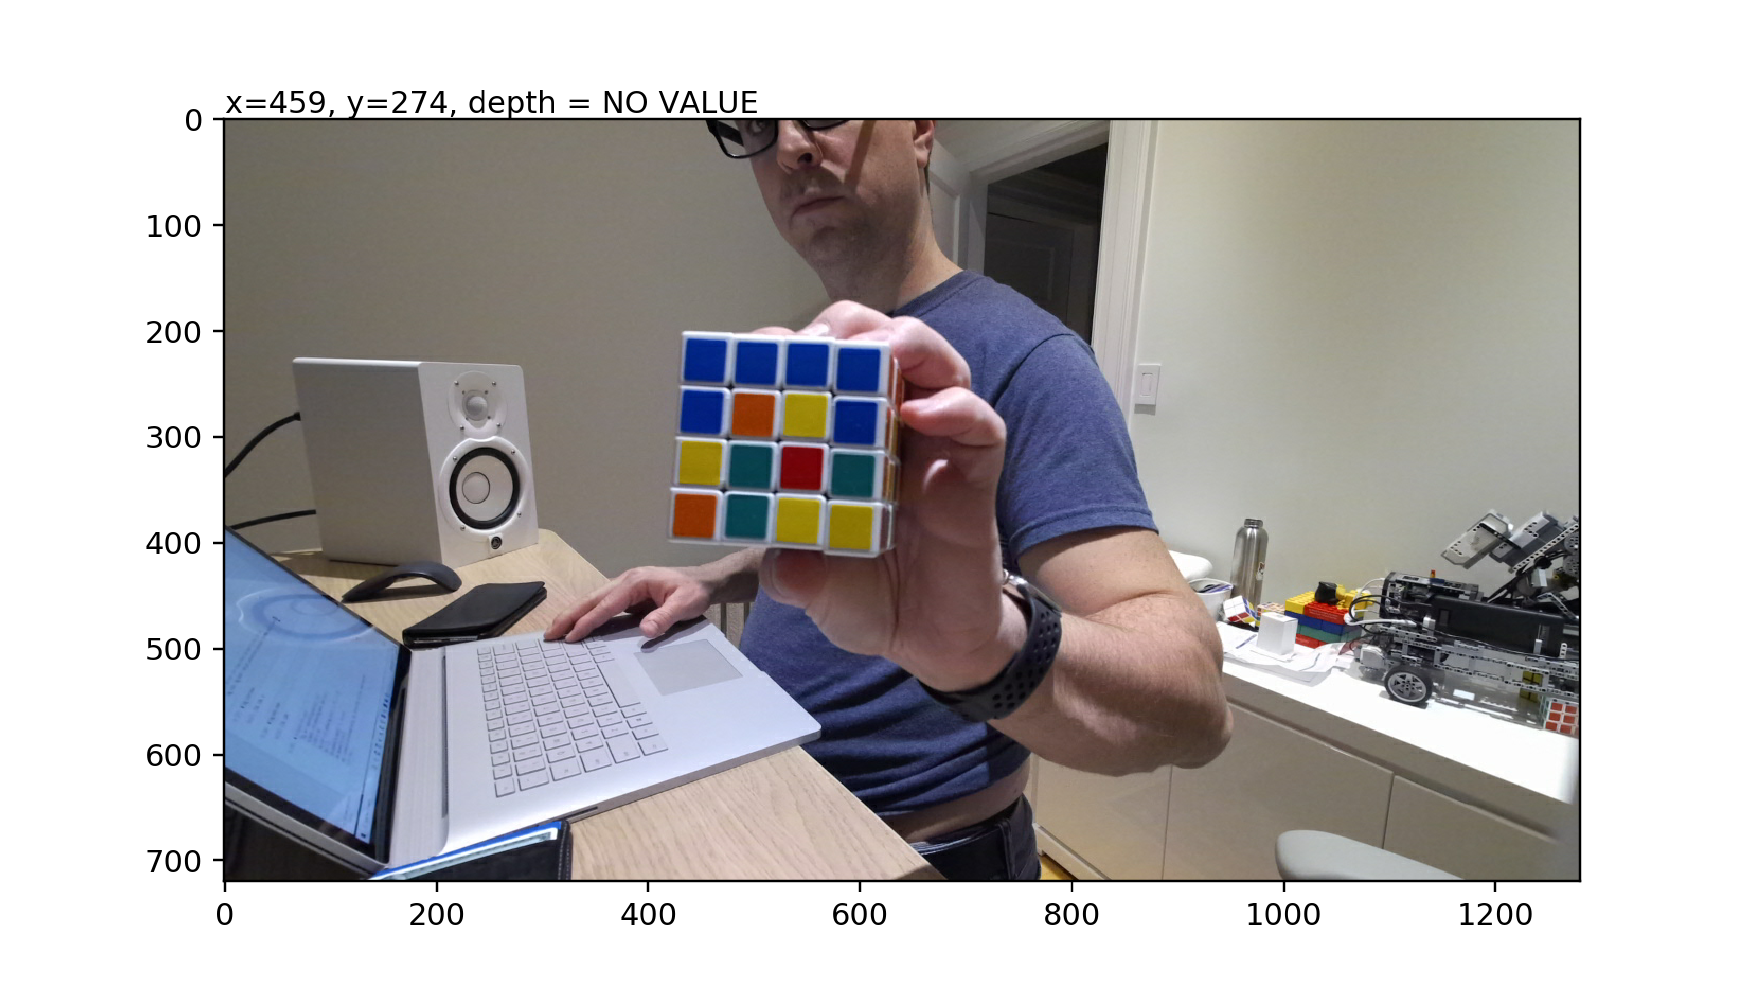

In [26]:
from math import floor
fig, ax = subplots(figsize=(16/2, 9/2))
im_depth = plt.imshow(img_color[:, :, :3][...,::-1]) # , cmap='gray')
text=ax.text(0, .05, "Depth : ", va="bottom", ha="left")

def onclick(event):
    x = floor(event.xdata)
    y = floor(event.ydata)
#     tx = floor(event.xdata)
    if img_depth[x, y]:
        tx = 'x=%d, y=%d, depth =%d' % (x, y, img_depth[x, y])
    else:
        tx = 'x=%d, y=%d, depth = NO VALUE' % (x, y)
    text.set_text(tx)
    print(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [27]:
k4a.disconnect()